In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/MyDrive/Colab Notebooks/fake_log"

/content/drive/MyDrive/Colab Notebooks/fake_log


#음..? 시각화..?

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/weblog.csv
./data/http-20220221204507.log


In [4]:
duplicate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake_log/data/weblog.csv',squeeze=True)
duplicate

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
...,...,...,...,...
16002,10.130.2.1,[02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16003,10.130.2.1,[02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200
16004,10.130.2.1,[02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16005,10.130.2.1,[02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200


In [5]:
duplicate.dtypes

IP       object
Time     object
URL      object
Staus    object
dtype: object

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake_log/data/weblog.csv',squeeze=True)
data=pd.DataFrame(df)

In [7]:
data.dtypes

IP       object
Time     object
URL      object
Staus    object
dtype: object

In [8]:
data['Time'] = data['Time'].map(lambda x: x.lstrip('['))
data['Time']

0        29/Nov/2017:06:58:55
1        29/Nov/2017:06:59:02
2        29/Nov/2017:06:59:03
3        29/Nov/2017:06:59:04
4        29/Nov/2017:06:59:06
                 ...         
16002    02/Mar/2018:15:47:12
16003    02/Mar/2018:15:47:23
16004    02/Mar/2018:15:47:32
16005    02/Mar/2018:15:47:35
16006    02/Mar/2018:15:47:46
Name: Time, Length: 16007, dtype: object

In [9]:
data['Time'] = data['Time'].str.split(':',n = 1, expand = True)[0]                 

In [10]:
data['Time'] = pd.to_datetime(data['Time'],format='%d%m%Y', errors='ignore')
data['Time']

0        29/Nov/2017
1        29/Nov/2017
2        29/Nov/2017
3        29/Nov/2017
4        29/Nov/2017
            ...     
16002    02/Mar/2018
16003    02/Mar/2018
16004    02/Mar/2018
16005    02/Mar/2018
16006    02/Mar/2018
Name: Time, Length: 16007, dtype: object

In [11]:
data = data.rename(columns={'Staus': 'Status'}, index={'ONE': 'one'})

In [12]:
data

,IP,Time,URL,Status
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200


In [13]:
data['URL']

0                              GET /login.php HTTP/1.1
1                           POST /process.php HTTP/1.1
2                               GET /home.php HTTP/1.1
3                GET /js/vendor/moment.min.js HTTP/1.1
4        GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1
                             ...                      
16002       GET /showcode.php?id=309&nm=ham05 HTTP/1.1
16003                  GET /allsubmission.php HTTP/1.1
16004       GET /showcode.php?id=309&nm=ham05 HTTP/1.1
16005                  GET /allsubmission.php HTTP/1.1
16006                           GET /home.php HTTP/1.1
Name: URL, Length: 16007, dtype: object

In [14]:
data['URL']=data['URL'].map(lambda x: x.lstrip('0'))
data.describe()

,IP,Time,URL,Status
count,16007,16007,16007,16007
unique,16,65,314,13
top,10.128.2.1,29/Jan/2018,GET /login.php HTTP/1.1,200
freq,4257,5092,3284,11330


In [15]:
data

,IP,Time,URL,Status
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200


In [16]:
data.isnull().sum().sum()

0

In [17]:
data['Time'][0]

'29/Nov/2017'

In [18]:
# converting the date_time into datetime format

data['month'] = data['Time'].str.slice(3, 6)
data['day'] = data['Time'].str.slice(0, 2) 

In [19]:
data

,IP,Time,URL,Status,month,day
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29
...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02


In [20]:
data['Methods'] = data['URL'].str.split('/').str[0]
if data['URL'].str.contains('.php').any():
    data['URL_new'] = data['URL'].str.split('/').str[1]
elif data['URL'].str.contains('.js').any():
    data['URL_new'] = data['URL'].str.split('/').str[3]

In [21]:
data

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29,GET,login.php HTTP
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29,POST,process.php HTTP
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29,GET,home.php HTTP
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,js
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,bootstrap-3.3.7
...,...,...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP


In [22]:
data['URL_new'] = data['URL_new'].str.split('HTTP')
data

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29,GET,"[login.php , ]"
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29,POST,"[process.php , ]"
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29,GET,"[home.php , ]"
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,[js]
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,[bootstrap-3.3.7]
...,...,...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,"[showcode.php?id=309&nm=ham05 , ]"
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,"[allsubmission.php , ]"
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,"[showcode.php?id=309&nm=ham05 , ]"
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,"[allsubmission.php , ]"


Text(0.5, 1.0, 'Most Popular Methods by the Users')

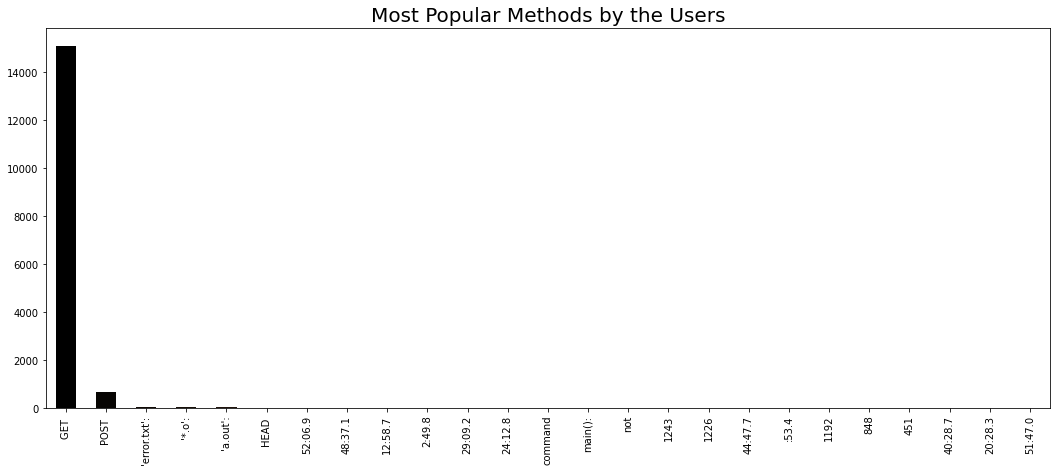

In [23]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['Methods'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Methods by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular URLs by the Users')

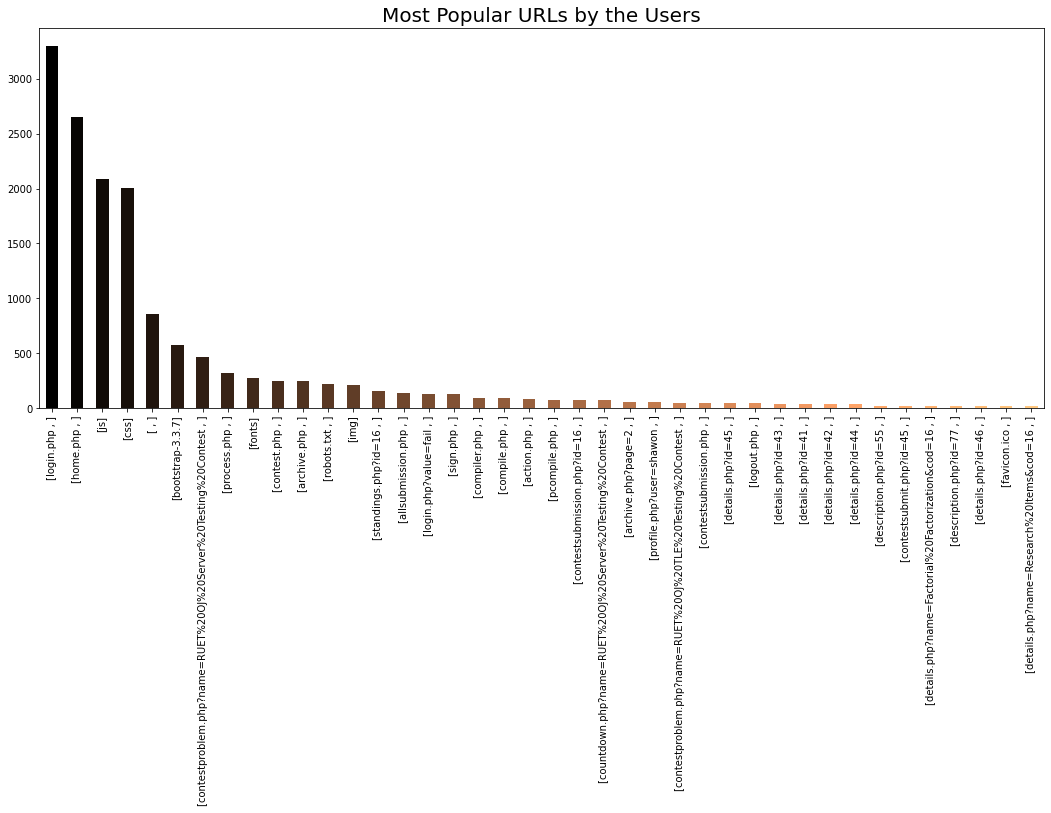

In [24]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['URL_new'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular URLs by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Months of Logins')

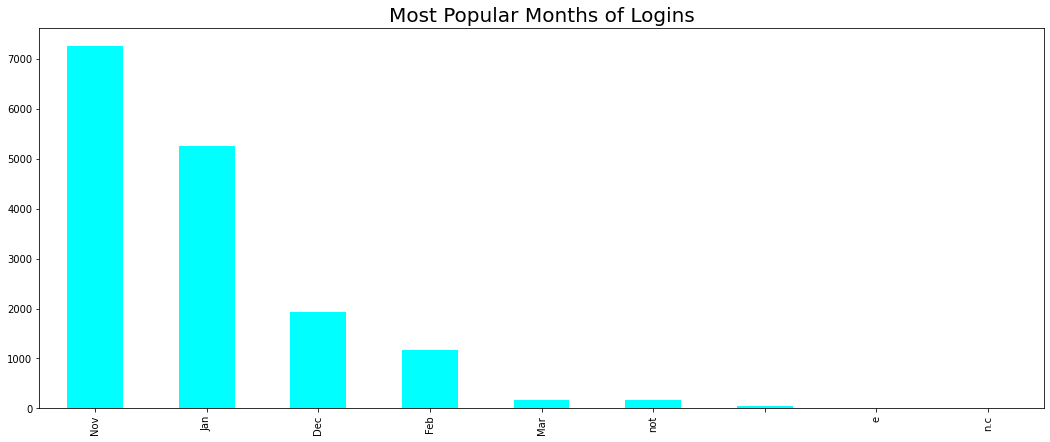

In [25]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['month'].value_counts().head(40).plot.bar(color = 'cyan')
plt.title('Most Popular Months of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Days of Logins')

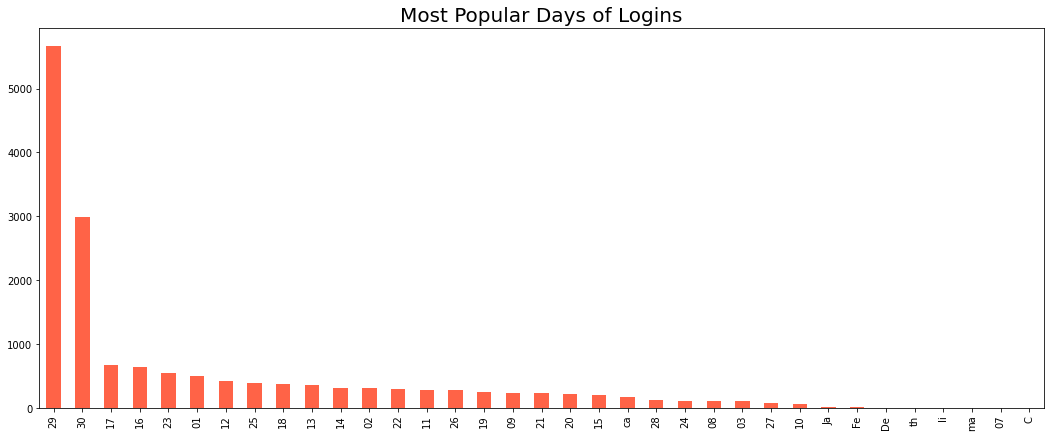

In [26]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['day'].value_counts().head(40).plot.bar(color = 'tomato')
plt.title('Most Popular Days of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular statuses for the Users')

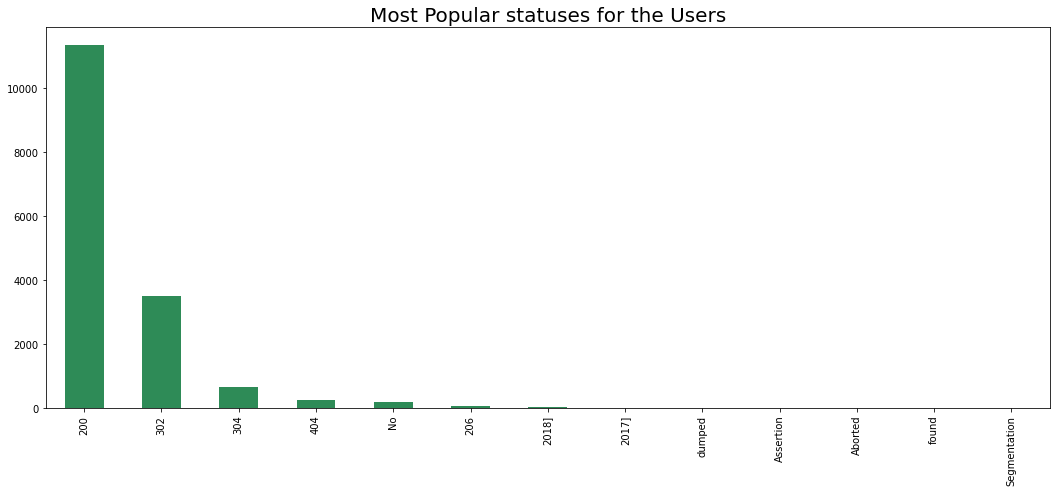

In [27]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
data['Status'].value_counts().head(40).plot.bar(color = 'seagreen')
plt.title('Most Popular statuses for the Users', fontsize = 20)

#전처리에 유용한 함수

In [28]:
# https://www.kaggle.com/rafaelsanchezsanchez/plsa-by-nnmf

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle
import re, string
%matplotlib notebook

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake_log/data/weblog.csv')
df.head(10)

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
5,10.130.2.1,[29/Nov/2017:06:59:19,GET /profile.php?user=bala HTTP/1.1,200
6,10.128.2.1,[29/Nov/2017:06:59:19,GET /js/jquery.min.js HTTP/1.1,200
7,10.131.2.1,[29/Nov/2017:06:59:19,GET /js/chart.min.js HTTP/1.1,200
8,10.131.2.1,[29/Nov/2017:06:59:30,GET /edit.php?name=bala HTTP/1.1,200
9,10.131.2.1,[29/Nov/2017:06:59:37,GET /logout.php HTTP/1.1,302


In [31]:
def clean_text(text):
    
    PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""    

    text = " ".join([c for c in text if c not in PUNCTUATION])
    
    text = re.sub(r"/"," ",text)
    return text

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
from nltk.tokenize import word_tokenize
df['URL'] = df['URL'].apply(word_tokenize)
df['text'] = df['URL'].apply(clean_text)
df.head()

,IP,Time,URL,Staus,text
0,10.128.2.1,[29/Nov/2017:06:58:55,"[GET, /login.php, HTTP/1.1]",200,GET login.php HTTP 1.1
1,10.128.2.1,[29/Nov/2017:06:59:02,"[POST, /process.php, HTTP/1.1]",302,POST process.php HTTP 1.1
2,10.128.2.1,[29/Nov/2017:06:59:03,"[GET, /home.php, HTTP/1.1]",200,GET home.php HTTP 1.1
3,10.131.2.1,[29/Nov/2017:06:59:04,"[GET, /js/vendor/moment.min.js, HTTP/1.1]",200,GET js vendor moment.min.js HTTP 1.1
4,10.130.2.1,[29/Nov/2017:06:59:06,"[GET, /bootstrap-3.3.7/js/bootstrap.js, HTTP/1.1]",200,GET bootstrap-3.3.7 js bootstrap.js HTTP 1.1


In [34]:
sentences = [''.join(text) for text in df['text']]

In [35]:
vectorizer = CountVectorizer(analyzer='word', max_features=1000)
x_counts = vectorizer.fit(sentences)
x_counts.vocabulary_

{'00': 0,
 '02': 1,
 '06': 2,
 '09': 3,
 '10': 4,
 '11': 5,
 '1192': 6,
 '12': 7,
 '1226': 8,
 '1243': 9,
 '13': 10,
 '14': 11,
 '16': 12,
 '193': 13,
 '20': 14,
 '201': 15,
 '202': 16,
 '202016': 17,
 '203': 18,
 '20a': 19,
 '20checking': 20,
 '20contest': 21,
 '20cse': 22,
 '20factorization': 23,
 '20feeling': 24,
 '20final': 25,
 '20for': 26,
 '20game': 27,
 '20items': 28,
 '20list': 29,
 '20little': 30,
 '20lucky': 31,
 '20makes': 32,
 '20mickle': 33,
 '20multiplication': 34,
 '20my': 35,
 '20oj': 36,
 '20rahaman': 37,
 '20server': 38,
 '20square': 39,
 '20test': 40,
 '20testing': 41,
 '20tle': 42,
 '20triangle': 43,
 '20valentine': 44,
 '218': 45,
 '222': 46,
 '24': 47,
 '27': 48,
 '28': 49,
 '280': 50,
 '281': 51,
 '282': 52,
 '283': 53,
 '284': 54,
 '285': 55,
 '286': 56,
 '287': 57,
 '288': 58,
 '289': 59,
 '29': 60,
 '290': 61,
 '294': 62,
 '296': 63,
 '300': 64,
 '301': 65,
 '304': 66,
 '308': 67,
 '309': 68,
 '313': 69,
 '33': 70,
 '338': 71,
 '339': 72,
 '34': 73,
 '35': 74

In [36]:
x_counts = vectorizer.transform(sentences)
x_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
x_counts

<16007x259 sparse matrix of type '<class 'numpy.int64'>'
	with 75274 stored elements in Compressed Sparse Row format>

In [38]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [39]:
x_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [41]:
#number of topics
num_topics=5
#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(xtfidf_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(init='nndsvd', n_components=5)

In [92]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        words_ids = []
        arg = model.components_[i].argsort()
        for j in range(len(arg)):
          if arg[j] > len(arg) - n_top_words -1:
            words_ids.append((arg[j],j))
        words_ids.sort(reverse=True)

        words = [feat_names[key] for _,key in words_ids]
        word_dict['Tarea # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict)

In [93]:
get_nmf_topics(model, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Tarea # 01,Tarea # 02,Tarea # 03,Tarea # 04,Tarea # 05
0,451,49,awesome,min,290
1,http,img,20my,20multiplication,emrul_mu
2,map,moment,451,47,http
3,allsubmission,awesome,45,46,51
4,283,20testing,44,451,tazbinur
5,281,222,43,45,out
6,20server,24,42,44,toph
7,announcement,aslan,41,43,55
8,33,34,40,42,20valentine
9,20rahaman,27,xyz_xyz,41,20items


In [44]:
#  https://www.kaggle.com/roshansharma/web-logging-data/notebook